In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (6, 6)
plt.rcParams["figure.dpi"] = 150

In [17]:
# SIS model

def run(N=1000000, alpha=5, gamma=0.5, t_end=10, delta_t=0.1):
    S = [N-1]
    I = [1]
    times = np.arange(0, t_end, delta_t)

    for t in times:
        S_new = S[-1] * (1. - alpha * delta_t / N * I[-1]) + gamma*delta_t*I[-1]
        I_new = I[-1] * (1. + alpha * delta_t / N * S[-1]) - gamma*delta_t*I[-1]

        if S_new < 0.:
            break

        S.append(S_new)
        I.append(I_new)
        
    return np.array(S), np.array(I), times

In [18]:
S, I, times = run(gamma=1.0)

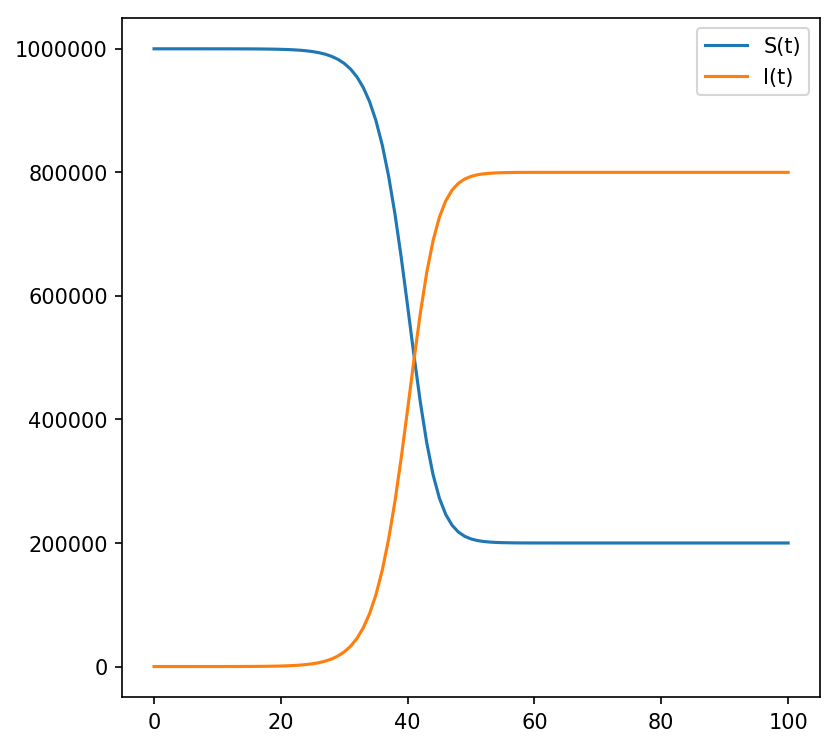

In [19]:
plt.plot(range(len(S)), S, label="S(t)")
plt.plot(range(len(S)), I, label="I(t)")
plt.legend()
plt.savefig("dynamics.png")
plt.show()

In [20]:
N = 1000000
t_end=20
delta_t = 1.0
p = []
k_max = 30

for k in range(1, k_max+1):
    S, I, times = run(N=N, gamma=1.0, alpha=k, delta_t=delta_t, t_end=t_end)
    cumsum = np.cumsum(I)
    p_k = np.zeros(len(cumsum))
    
    for i in range(len(p_k)):
        p_k[i] = 1 - (1 - k/N) ** cumsum[i]
        
    p.append(p_k)
    
p = np.array(p)

In [21]:
q = np.ones((k_max, len(p[0])))
for i, p_i in enumerate(p):
    q[i, :len(p_i)] = p_i

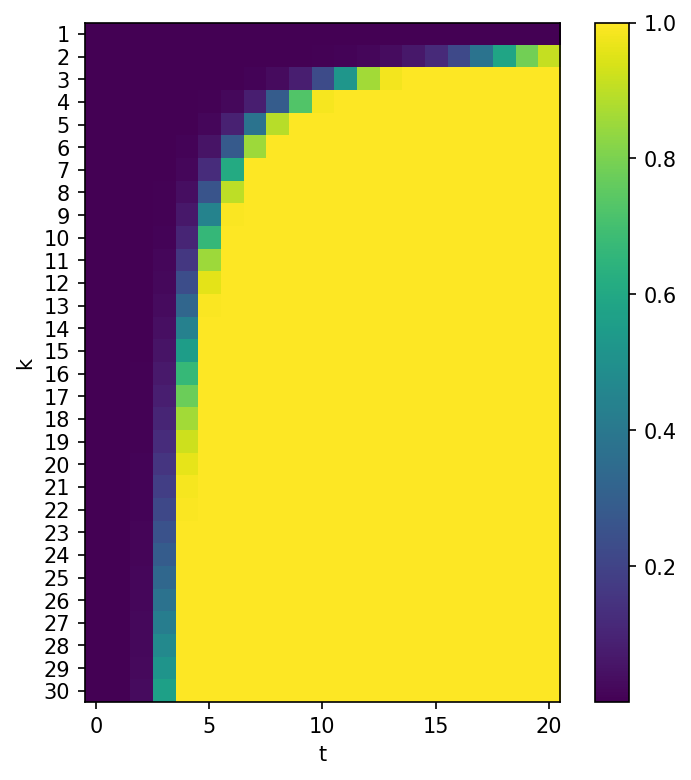

In [22]:
plt.imshow(q)
plt.yticks(range(len(q)), range(1, k_max+1))
plt.ylabel("k")
plt.xlabel("t")
plt.colorbar()
plt.savefig("pdelivery.png")
plt.show()